In [3]:
import pandas as pd
import numpy as np
from io import StringIO
from classes import BalancedUndersamplingShuffle, balanced_sampling
from helpers import plot_learning_curve, plot_validation_curve, fit_and_score_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import fbeta_score, make_scorer

In [4]:
from scipy.io import arff

with open('1year.arff','r') as f:
    data1, meta1 = arff.loadarff(f)
    data1 = np.asarray(data1.tolist(), dtype=np.float32)
    print(data1.shape)

with open('2year.arff','r') as f:
    data2, meta2 = arff.loadarff(f)
    data2 = np.asarray(data2.tolist(), dtype=np.float32)
    print(data2.shape)

with open('3year.arff','r') as f:
    data3, meta3 = arff.loadarff(f)
    data3 = np.asarray(data3.tolist(), dtype=np.float32)
    print(data3.shape)

with open('4year.arff','r') as f:
    data4, meta4 = arff.loadarff(f)
    data4 = np.asarray(data4.tolist(), dtype=np.float32)
    print(data4.shape)

with open('5year.arff','r') as f:
    data5, meta5 = arff.loadarff(f)
    data5 = np.asarray(data5.tolist(), dtype=np.float32)
    print(data5.shape)


(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


In [5]:
data = np.concatenate([data1, data2, data3, data4, data5], axis=0)
data[np.isnan(data)] = 0

X, y = data[:,:-1], data[:, -1]
X, y, idx = balanced_sampling(X, y, r = 3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


print(f'X.shape={X.shape}, y.shape={y.shape}')

a=0.10662111516202229, r=3, gamma=19.758010521281683
X.shape=(8362, 64), y.shape=(8362,)


# Naive fit

In [6]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.7054603427660423

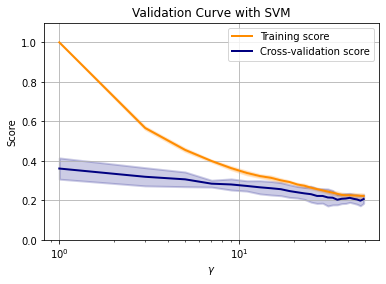

In [8]:
# optimize hidden_layer_sizes
param_range = range(1, 50, 2)

results = []
scoring = 'recall'
classifier = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

train_scores, test_scores = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_neighbors', param_range=param_range,
                      cv=cv, scoring='recall', n_jobs=8)

In [ ]:
test_scores_mean = np.mean(test_scores, axis=1)
optimal_min_samples_leaf = param_range[np.argmax(test_scores_mean)]
print(f'optimal min_samples_leaf={optimal_min_samples_leaf}, f1={test_scores_mean[optimal_min_samples_leaf]}')

#Validate on test set
classifier = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=optimal_max_depth, 
                                   min_samples_split = optimal_min_samples_split,
                                   min_samples_leaf = optimal_min_samples_leaf)
scorer = check_scoring(classifier, scoring='f1')
classifier.fit(X_train, y_train)
scorer(classifier, X_test, y_test)

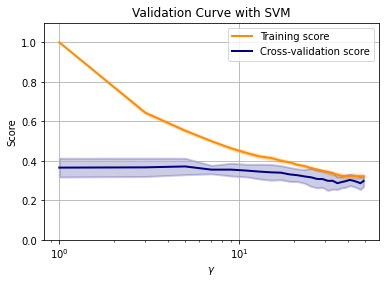

In [9]:
# optimize hidden_layer_sizes
param_range = range(1, 50, 2)

results = []
scoring = 'recall'
classifier = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

train_scores, test_scores = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_neighbors', param_range=param_range,
                      cv=cv, scoring='f1', n_jobs=8)

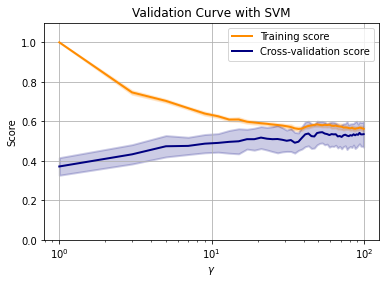

In [11]:
# k - precision
param_range = range(1, 100, 2)

results = []
scoring = 'recall'
classifier = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

train_scores, test_scores = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_neighbors', param_range=param_range,
                      cv=cv, scoring='precision', n_jobs=8)

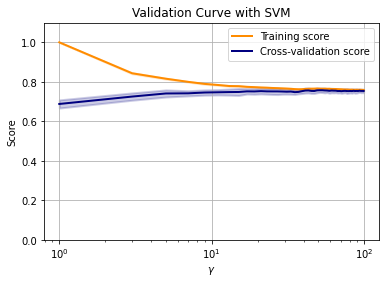

In [12]:
# k - precision
param_range = range(1, 100, 2)

results = []
scoring = 'recall'
classifier = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

train_scores, test_scores = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_neighbors', param_range=param_range,
                      cv=cv, scoring='accuracy', n_jobs=8)